In [27]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# CENTRAL LIMIT THEOREM

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30) from the population, then the distribution of the sample means will be approximately normally distributed

In [4]:
roll  = stats.randint(1, 7)

Text(0.5, 1.0, 'Uniform Population distribution')

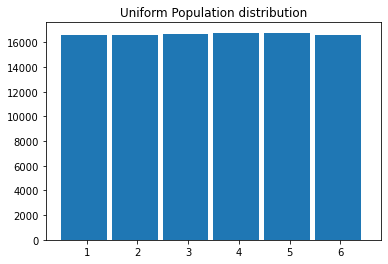

In [5]:
plt.hist(roll.rvs(100000), bins= [1,2,3,4,5,6,7], align = 'left', width = 0.9)
plt.title('Uniform Population distribution')

In [6]:
roll.rvs(100000).mean()

3.48898

## Distribution of Sample Means
https://github.com/CodeupClassroom/florence-statistics-exercises/blob/master/comparing_means-lesson.ipynb


____________________________________________________________________

# T-Test

### One Sample T-Test

- (ex): comparing the mean (height) of one subgroup (mean) with overall population

- Goal: Compare observed mean to theoretical one

- Data Needed: array-like of observed values & float of theoretical

- $H_o$: mean of observed group = mean of population 

- Assumptions:
    - normal distribution

- Parametric Test: scipy.stats.ttest_1samp

### Two Sample T-Test or Independent T-Test

- (ex:) is average height of men different then the average height of women?

- Goal: two subgroups we are comparing

- Data Needed: 2 array-like samples

- $H_o$: average height for men is the same as average height for women

- Assumptions
    - normal distribution
    - samples are independent
    - equal variances

- Parametric Test: scipy.stats.ttest_ind
    

#### MORE INFO (WHAT IF):
- If assumptions can't be met, the equivalent non-parametric test can be used.

- Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.

- The argument in the stats.ttest_ind() method of equal_var can be set to False to accomodate this assumption.

## MOST IMPORTANT thing about about being a data scientist is asking the RIGHT question! -Ravinder

#### Work flow Walkthrough
1. Plot Distribition (ie series.Histogram)
2. Establish hypothesis
3. Set significance level: α = .05
    - very specific to domain (.05 is not always accepted)
    - .05 means theres a 1/20 change you are wrong, this may not be accepted in medical fields or vehicle safety
4. Verify Assumptions
    - normal distributions or at least 30 observations
    - The more observations you have, the less "normal" the distribution has to be
5. Compute test stats and propability using scipy.stats.ttest_1samp.
6. Decide. 


- 2 tail: 
    - signifcantly different. 
    - mean for sample is NOT the same as overall population. 
    - larger AND smaller
    - we take the p-value as is.
    
- 1 tail: 
    - sample significantly smaller OR larger then population  
    - For a 1-tailed test:
        - we evaluate $p/2 < \alpha$ and $t> 0$ (to test if higher), 
        - and of a less-than test when $p/2 < \alpha$ and $t < 0$.

___________________________________________________________

### EXAMPLE 1:

I believe customers who churn are charged more (monthly average) than the overall average monthly charges.
Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers?

- We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.

In [9]:
df = pd.read_csv("Cust_Churn_Telco.csv")

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# STEP 1- PLOT DISTRIBUTION

##### STEP 2- SET HYPOTHESIS
$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers

In [14]:
#D. VERIFY ASSUMPTIONS
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#E. COMPUTE TEST STATS AND PROBABILITY
t, p = stats.ttest_1

### EXAMPLE 2
- 2 sample T-Test
- monthly charges for customers who churn vs customers who don't churn

#### STEP 1- PLOT DISTRIBUTION

<AxesSubplot:>

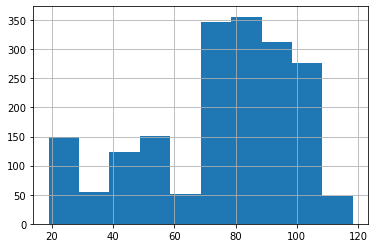

In [18]:
churn_sample = df[df.Churn == 'Yes'].MonthlyCharges
churn_sample.hist()
#this plots mean of monthly charges for customers who DO churn

<AxesSubplot:>

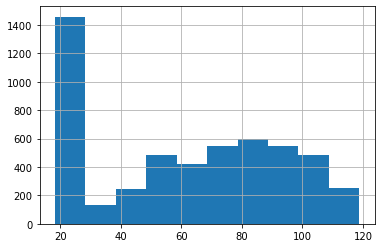

In [19]:
no_churn_sample = df[df.Churn == 'No'].MonthlyCharges
no_churn_sample.hist()
#this plots mean of monthly charges for customers who DONT churn

#### STEP 2- Set hypothesis

- $H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers
- $H_{a}$: Mean of monthly charges of churned customers != Mean of monthly charges of all customers

##### STEP 3- Set alpha

In [ ]:
α=.05

#### STEP 4- Verify Assumption
- samples are independent = YES
- normal distribution = YES
- equal variance = YES

In [20]:
# TO check VARIANCES:
churn_sample.var(), no_churn_sample.var()
# this means variance is NOT equal

(608.4141833954304, 966.7527670734287)

#### STEP 5: Compute Test Statistics

In [25]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var= False)
#order does matter

## EXAMPLE 3
- Are charges of customers who churn significantly different than those who do not churn?
- $H_{0}$: charges of customers who churn equals that of those who don't churn.
- $H_{a}$: charges of customers who churn is not equal to that of those who don't churn.
- We can use 2 sample, 2-tailed t-test here

# MPG EXAMPLE


In [29]:
df = sns.load_dataset('mpg')
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [30]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [32]:
df = df.dropna()
#^-- this drops the nulls

#### Do the vehicle built in USA have higher HP than vehicle from Japan?

In [33]:
#create two seperate dataframes
# USA vs Japan
usa_hp = df[df.origin == 'usa'].horsepower
japan_hp = df[df.origin == 'japan'].horsepower

In [34]:
#### Plot Distribution

<AxesSubplot:>

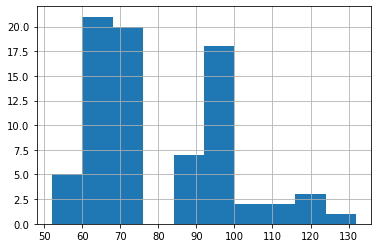

In [35]:
japan_hp.hist()

<AxesSubplot:>

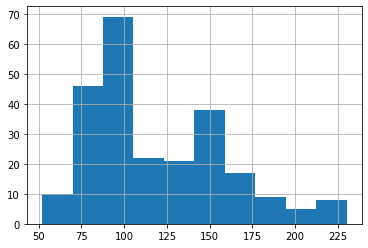

In [36]:
usa_hp.hist()


#### Hypothesis
- $H_{0}$: hp is the same for usa and japan origin vehicles
- $H_{a}$: hp is not the for usa and japan origin vehicles


#### Significance Level
- $\alpha$ is already set to .05 (95% cofidence level)

#### Verify Assumptions
- Normal: yes!
- Independent: yes!
- Variance: ?

In [39]:
# Check variance
usa_hp.var(), japan_hp.var()
#this shows the variance is NOT the same. so must set variance to false

(1591.8336567413864, 317.5238558909445)

In [40]:
t, p = stats.ttest_ind(usa_hp, japan_hp, equal_var=False)
t,p

(12.092022948407953, 1.5146320352820352e-27)

#### Decide
is p-value less than alpha?

In [42]:
p < .05

True

##### Reject null hypothesis. the hp of usa cars vs japan cars is significantly different

### MINI EXERCISES: 
- Are the USA origin vehicles heavier than vehicles with European origin?

In [45]:
usa_weight = df[df.origin == 'usa'].weight
europe_weight = df[df.origin == 'japan'].weight

## first of all.... Decide!
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [55]:
## we'll use 2 sample and 1 tailed

#### STEP 1: PLOT DISTRIBUTION

<AxesSubplot:>

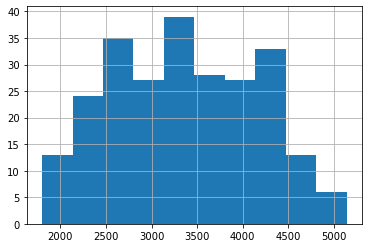

In [47]:
usa_weight.hist()

<AxesSubplot:>

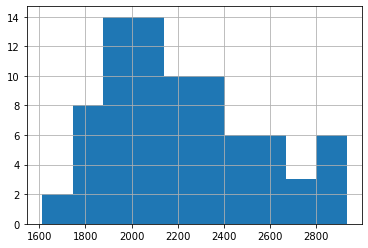

In [48]:
europe_weight.hist()

#### STEP 2: SET HYPOTHESIS

- $H_{0}$: average weight for usa == european origin vehicles
- $H_{a}$: average weight for usa > european origin vehicles

#### STEP 3: SET ALPHA

In [50]:
alpha = 0.05

#### STEP 4: VERIFY ASSUMPTIONS

In [56]:
# Normal: yes!
# Independent: yes!
# Variance: ?

In [61]:
#to check variance
usa_weight.var(), europe_weight.var()
# this shows they are NOT the same, need to set Var to false
# equal_var=False

(632576.3574774171, 102718.48588120737)

#### STEP 5: COMPUTE TEST STATS

In [57]:
t, p = stats.ttest_ind(usa_weight, europe_weight, equal_var=False)
t, p/2, alpha

(18.477210677200812, 4.197101303537906e-52, 0.05)

#### STEP 6: DECIDE

- we reject our $H_0$, US vehicle do not weigh the same as european vehicles

_______________________________________________________

### decide p/2 if its one tailed
### do not decide p by 2 is it is 2 tailed

In [59]:
# if "t" is positive it means the first value is more than the second value
t, p = stats.ttest_ind(usa_weight, europe_weight, equal_var=False)
t,p
# ex: usa_weight is greater than europe weight because the "t" is positive

(18.477210677200812, 8.394202607075812e-52)

In [60]:
# ^-- 't' is 18.477 so usa is more than europe